<a href="https://colab.research.google.com/github/ElizaLo/ML-with-Jupiter/blob/master/ML_Practice_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!df -h # характеристики 

Filesystem      Size  Used Avail Use% Mounted on
overlay          40G  7.8G   30G  22% /
tmpfs           6.4G     0  6.4G   0% /dev
tmpfs           6.4G     0  6.4G   0% /sys/fs/cgroup
tmpfs           6.4G  4.0K  6.4G   1% /var/colab
/dev/sda1        46G  9.4G   36G  21% /etc/hosts
shm              64M     0   64M   0% /dev/shm
tmpfs           6.4G     0  6.4G   0% /sys/firmware


In [2]:
!cat /proc/meminfo # сколько оперативной памяти

MemTotal:       13335204 kB
MemFree:        11595176 kB
MemAvailable:   12691832 kB
Buffers:           58312 kB
Cached:          1209644 kB
SwapCached:            0 kB
Active:           442152 kB
Inactive:        1102776 kB
Active(anon):     248496 kB
Inactive(anon):      308 kB
Active(file):     193656 kB
Inactive(file):  1102468 kB
Unevictable:           0 kB
Mlocked:               0 kB
SwapTotal:             0 kB
SwapFree:              0 kB
Dirty:               136 kB
Writeback:             0 kB
AnonPages:        274820 kB
Mapped:           157252 kB
Shmem:               796 kB
Slab:             110864 kB
SReclaimable:      84560 kB
SUnreclaim:        26304 kB
KernelStack:        3360 kB
PageTables:         4328 kB
NFS_Unstable:          0 kB
Bounce:                0 kB
WritebackTmp:          0 kB
CommitLimit:     6667600 kB
Committed_AS:    1697564 kB
VmallocTotal:   34359738367 kB
VmallocUsed:           0 kB
VmallocChunk:          0 kB
AnonHugePages:         0 kB
ShmemHugePages:  

In [3]:
!cat /proc/cpuinfo # процессор

processor	: 0
vendor_id	: GenuineIntel
cpu family	: 6
model		: 63
model name	: Intel(R) Xeon(R) CPU @ 2.30GHz
stepping	: 0
microcode	: 0x1
cpu MHz		: 2300.000
cache size	: 46080 KB
physical id	: 0
siblings	: 2
core id		: 0
cpu cores	: 1
apicid		: 0
initial apicid	: 0
fpu		: yes
fpu_exception	: yes
cpuid level	: 13
wp		: yes
flags		: fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc rep_good nopl xtopology nonstop_tsc cpuid pni pclmulqdq ssse3 fma cx16 sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand hypervisor lahf_lm abm pti ssbd ibrs ibpb stibp fsgsbase tsc_adjust bmi1 avx2 smep bmi2 erms xsaveopt arat arch_capabilities
bugs		: cpu_meltdown spectre_v1 spectre_v2 spec_store_bypass l1tf
bogomips	: 4600.00
clflush size	: 64
cache_alignment	: 64
address sizes	: 46 bits physical, 48 bits virtual
power management:

processor	: 1
vendor_id	: GenuineIntel
cpu family	: 6
model		: 63
mode

In [4]:
!pip list # список пакетов

Package                  Version   
------------------------ ----------
absl-py                  0.6.1     
altair                   2.2.2     
astor                    0.7.1     
beautifulsoup4           4.6.3     
bleach                   3.0.2     
cachetools               2.1.0     
certifi                  2018.10.15
chardet                  3.0.4     
crcmod                   1.7       
cycler                   0.10.0    
cymem                    2.0.2     
cytoolz                  0.9.0.1   
decorator                4.3.0     
defusedxml               0.5.0     
dill                     0.2.8.2   
entrypoints              0.2.3     
filelock                 3.0.9     
future                   0.16.0    
gast                     0.2.0     
google-api-core          1.5.0     
google-api-python-client 1.6.7     
google-auth              1.4.2     
google-auth-httplib2     0.0.3     
google-auth-oauthlib     0.2.0     
google-cloud-bigquery    1.1.0     
google-cloud-core        0.2

In [5]:
!pip list | grep numpy # grep - сортирует и ищет нужный пакет

msgpack-numpy            0.4.3.2   
numpy                    1.14.6    


In [0]:
import keras

In [13]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 3s 0us/step


In [0]:
import matplotlib.pyplot as plt

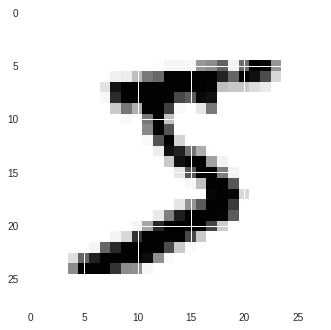

In [15]:
plt.imshow(x_train[0])
plt.show()

In [0]:
import keras.backend as K

In [17]:
K.image_data_format()

'channels_last'

In [0]:
Ntrain = x_train.shape[0]
rows = 28
cols = 28
Ntest = x_test.shape[0]

In [0]:
x_train = x_train.reshape(Ntrain, rows, cols, 1)/255
x_test = x_test.reshape(Ntest, rows, cols, 1)/255

In [0]:
y_train_cat = keras.utils.to_categorical(y_train, 10)
y_test_cat = keras.utils.to_categorical(y_test, 10)

# Logistic regression

In [0]:
model = keras.models.Sequential()

In [0]:
from keras.layers import Dense, Flatten  # добавляем слои

In [0]:
input_shape = (28, 28, 1)

In [0]:
model.add(Flatten(input_shape = input_shape)) # изображение в долгий вектор
model.add(Dense(10, activation = 'softmax'))

In [0]:
model.compile(optimizer = keras.optimizers.Adam(lr = 0.01), 
              loss = keras.losses.categorical_crossentropy,
              metrics = ['accuracy'])

In [26]:
model.fit(x_train, y_train_cat, batch_size = 128, epochs = 10)

Epoch 1/10
60000/60000 [==============================] - 4s 74us/step - loss: 0.3682 - acc: 0.8957
Epoch 2/10
60000/60000 [==============================] - 3s 42us/step - loss: 0.2912 - acc: 0.9190
Epoch 3/10
60000/60000 [==============================] - 3s 42us/step - loss: 0.2824 - acc: 0.9220
Epoch 4/10
60000/60000 [==============================] - 3s 42us/step - loss: 0.2751 - acc: 0.9243
Epoch 5/10
60000/60000 [==============================] - 3s 42us/step - loss: 0.2714 - acc: 0.9250
Epoch 6/10
60000/60000 [==============================] - 3s 42us/step - loss: 0.2683 - acc: 0.9258
Epoch 7/10
60000/60000 [==============================] - 3s 42us/step - loss: 0.2692 - acc: 0.9257
Epoch 8/10
60000/60000 [==============================] - 3s 42us/step - loss: 0.2674 - acc: 0.9245
Epoch 9/10
60000/60000 [==============================] - 3s 42us/step - loss: 0.2688 - acc: 0.9255
Epoch 10/10
60000/60000 [==============================] - 3s 42us/step - loss: 0.2635 - acc: 0.9261

In [27]:
score = model.evaluate(x_test, y_test_cat)

10000/10000 [==============================] - 1s 74us/step


In [28]:
print(score)

[0.29930576873123643, 0.9251]


# Model 2

In [0]:
model2 = keras.models.Sequential()
model2.add(Flatten(input_shape = input_shape)) # преобразовывает изображение в длинный вектор
model2.add(Dense(100, activation = 'relu'))
model2.add(Dense(10, activation = 'softmax'))

In [0]:
model2.compile(optimizer = keras.optimizers.Adam(lr = 0.01), 
              loss = keras.losses.categorical_crossentropy,
              metrics = ['accuracy'])

In [31]:
model2.fit(x_train, y_train_cat, batch_size = 128, epochs = 10)

Epoch 1/10
60000/60000 [==============================] - 3s 49us/step - loss: 0.2195 - acc: 0.9347
Epoch 2/10
60000/60000 [==============================] - 3s 47us/step - loss: 0.1132 - acc: 0.9654
Epoch 3/10
60000/60000 [==============================] - 3s 48us/step - loss: 0.0932 - acc: 0.9718
Epoch 4/10
60000/60000 [==============================] - 3s 48us/step - loss: 0.0787 - acc: 0.9761
Epoch 5/10
60000/60000 [==============================] - 3s 47us/step - loss: 0.0720 - acc: 0.9781
Epoch 6/10
60000/60000 [==============================] - 3s 48us/step - loss: 0.0629 - acc: 0.9809
Epoch 7/10
60000/60000 [==============================] - 3s 47us/step - loss: 0.0615 - acc: 0.9815
Epoch 8/10
60000/60000 [==============================] - 3s 47us/step - loss: 0.0603 - acc: 0.9825
Epoch 9/10
60000/60000 [==============================] - 3s 47us/step - loss: 0.0651 - acc: 0.9812
Epoch 10/10
60000/60000 [==============================] - 3s 48us/step - loss: 0.0586 - acc: 0.9842

In [33]:
score = model2.evaluate(x_test, y_test_cat)

10000/10000 [==============================] - 1s 73us/step


In [34]:
print(score)

[0.15517762391453424, 0.9718]


# **Convolutional Neural Network (CNN)**

In [0]:
from keras.layers import Conv2D, MaxPool2D

In [0]:
model3 = keras.models.Sequential()


model3.add(Conv2D(32, kernel_size = (3,3), padding = 'same',
                 input_shape = input_shape, activation = 'relu')) # relu
model3.add(MaxPool2D()) # max pool


model3.add(Conv2D(64, kernel_size = (3,3), padding = 'same',
                 input_shape = input_shape, activation = 'relu')) # relu
model3.add(MaxPool2D()) # max pool


model3.add(Conv2D(128, kernel_size = (3,3), padding = 'same',
                 input_shape = input_shape, activation = 'relu')) # relu
model3.add(MaxPool2D(7,7)) # max pool


model3.add(Flatten()) # изображение в долгий вектор
model3.add(Dense(10, activation = 'softmax'))

In [0]:
model3.compile(optimizer = keras.optimizers.Adam(lr = 0.01), 
              loss = keras.losses.categorical_crossentropy,
              metrics = ['accuracy'])

In [41]:
model3.fit(x_train, y_train_cat, batch_size = 128, epochs = 30)

Epoch 1/30
60000/60000 [==============================] - 8s 127us/step - loss: 0.0417 - acc: 0.9894
Epoch 2/30
60000/60000 [==============================] - 8s 126us/step - loss: 0.0299 - acc: 0.9926
Epoch 3/30
60000/60000 [==============================] - 8s 126us/step - loss: 0.0299 - acc: 0.9924
Epoch 4/30
60000/60000 [==============================] - 8s 127us/step - loss: 0.0355 - acc: 0.9914
Epoch 5/30
60000/60000 [==============================] - 8s 126us/step - loss: 0.0338 - acc: 0.9918
Epoch 6/30
60000/60000 [==============================] - 8s 127us/step - loss: 0.0453 - acc: 0.9908
Epoch 7/30
60000/60000 [==============================] - 8s 127us/step - loss: 0.0339 - acc: 0.9928
Epoch 8/30
60000/60000 [==============================] - 8s 126us/step - loss: 0.0325 - acc: 0.9931
Epoch 9/30
60000/60000 [==============================] - 8s 126us/step - loss: 0.0300 - acc: 0.9935
Epoch 10/30
60000/60000 [==============================] - 8s 126us/step - loss: 0.0359 - a

In [45]:
score = model3.evaluate(x_test, y_test_cat)

10000/10000 [==============================] - 1s 116us/step


In [46]:
print(score)

[0.28013557880521694, 0.9825]


In [47]:
!nvidia-smi

Wed Oct 31 13:50:32 2018       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 396.44                 Driver Version: 396.44                    |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   47C    P0    70W / 149W |    589MiB / 11441MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [52]:
model3.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 128)         73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 1, 1, 128)         0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 128)               0         
__________

In [0]:
from google.colab import drive #connect to Google Drive

In [54]:
!pwd # текущее месторасположение

/content


In [55]:
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import os 

In [0]:
os.chdir("drive")

In [59]:
!ls

'My Drive'


In [0]:
os.chdir("My Drive")

In [61]:
!ls

 CV		  'Must See San Francisco.gsheet'   WWCode
'Madrid .gsheet'   Polishes			    КНУ.gsheet
'ML Practice'	   Untitled0.ipynb


In [0]:
os.chdir("ML Practice")

In [0]:
model3_json = model3.to_json()

In [67]:
model3_json


'{"class_name": "Sequential", "config": [{"class_name": "Conv2D", "config": {"name": "conv2d_1", "trainable": true, "batch_input_shape": [null, 28, 28, 1], "dtype": "float32", "filters": 32, "kernel_size": [3, 3], "strides": [1, 1], "padding": "same", "data_format": "channels_last", "dilation_rate": [1, 1], "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "VarianceScaling", "config": {"scale": 1.0, "mode": "fan_avg", "distribution": "uniform", "seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "bias_constraint": null}}, {"class_name": "MaxPooling2D", "config": {"name": "max_pooling2d_1", "trainable": true, "pool_size": [2, 2], "padding": "valid", "strides": [2, 2], "data_format": "channels_last"}}, {"class_name": "Conv2D", "config": {"name": "conv2d_2", "trainable": true, "batch_input_shape": [null, 28, 28, 1], "dtype": "floa

In [0]:
model3_json_file = open("model3_json", "w")
model3_json_file.write(model3_json)
model3_json_file.close()

In [0]:
model3.save_weights("model3_weights.h5")